# GRIP: The Sparks Foundation

# Data Science and Business Analytics Internship

# Author: Suchandra Majumder

# Task 1: Prediction Using Supervised Machine Learning

In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

# Importing Modules:

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


# Reading and Observing Data

In [22]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df= pd.read_csv(url)

In [23]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [25]:
df.shape

(25, 2)

In [26]:
df.info() #number of rows and coloumns the dataset has

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [27]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [28]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

We do not have any null values in our data set. So we can process further.

# Visualizing the dataset

We plot the dataset to check whether there is any relation between the two variables or not



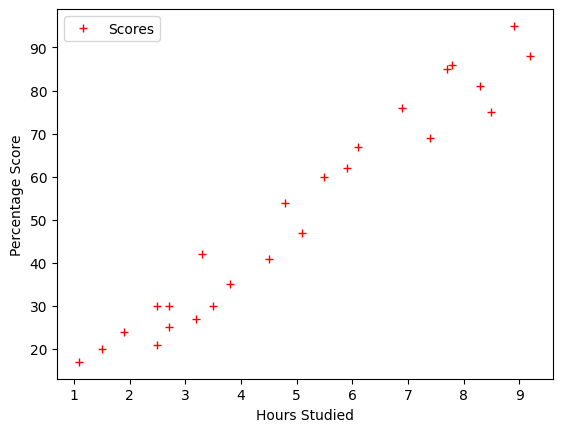

In [29]:
df.plot(x= 'Hours', y= 'Scores', style='+',color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [30]:
df.corr() #corelation of the variables in the dataset

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We can clearly see here that there is a positive linear relationship between Hours and Scores which implies that if the number of hours increase the score will also increase. So we will use linear regression model for the predictions.

# Making Predictions

C:\Users\SUCHANDRA\AppData\Local\Temp\ipykernel_20092\3814935987.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Hours"],color ='green')


<Axes: xlabel='Hours', ylabel='Density'>

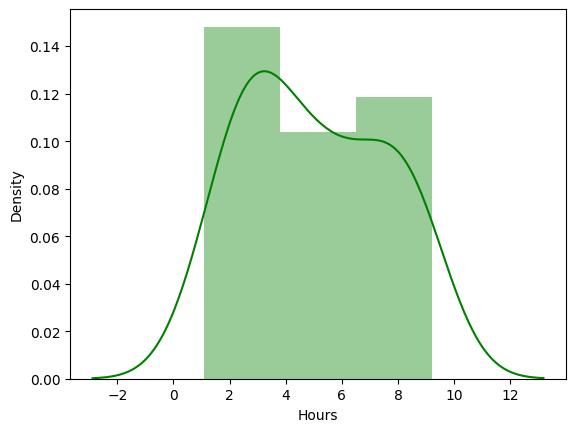

In [37]:
sns.distplot(df["Hours"],color ='green')

C:\Users\SUCHANDRA\AppData\Local\Temp\ipykernel_20092\3857117444.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Scores"], color='red')


<Axes: xlabel='Scores', ylabel='Density'>

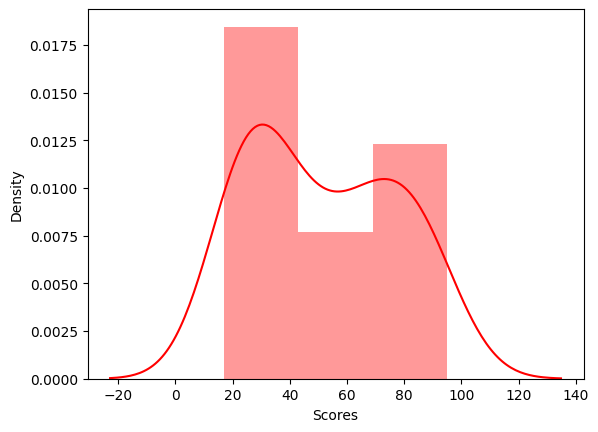

In [38]:
sns.distplot(df["Scores"], color='red')

After plotting the distribution plot of the two variables we can see that the variables are in a particular range and there are no outliers in the variable.

<Axes: xlabel='Hours', ylabel='count'>

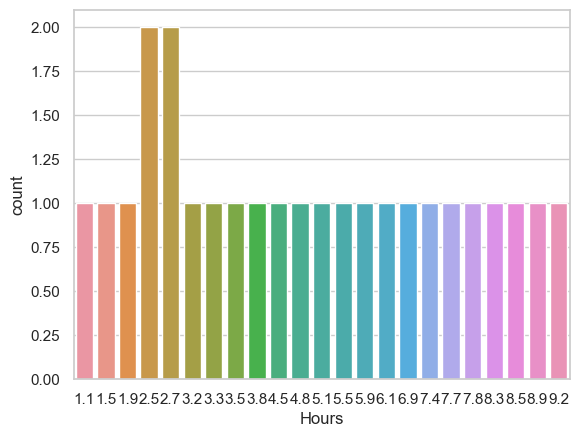

In [64]:
import seaborn as sns
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df= pd.read_csv(url)
sns.countplot(x='Hours',data= df)




<Axes: >

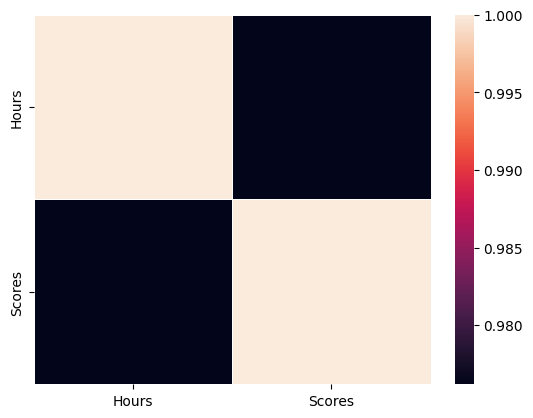

In [11]:
sns.heatmap(df.corr(),cbar = True,linewidths = 0.5)

<Axes: xlabel='Hours', ylabel='Scores'>

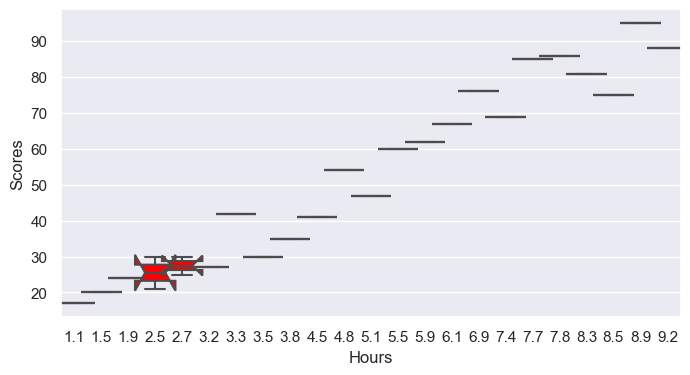

In [123]:
sns.boxplot(x='Hours', y='Scores',data = df,width = 1.5,saturation=2,color='red',notch = True)

# Preparing the data

In [134]:
#using iloc function we divide data
x= df.iloc[:, :1].values
y= df.iloc[:, 1:].values

In [129]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [137]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

# Modeling the data

In [135]:
#splitting the data into train & test dataset
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [136]:
#training the model
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Visualizing the model

We are going to plot the best fit line here

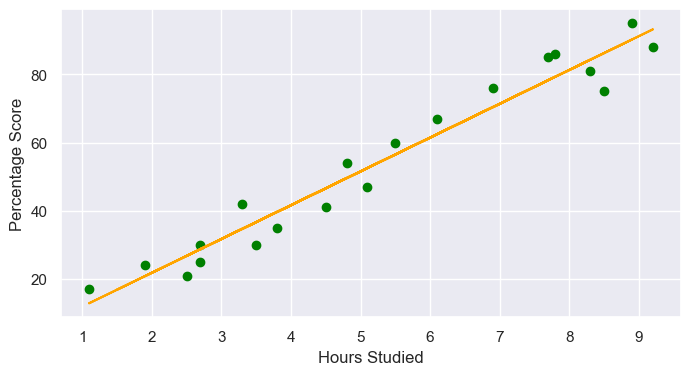

In [137]:
m=model.coef_
c=model.intercept_
line= m*x+c
#plotting for the training data
plt.scatter(x_train,y_train,color='green')
plt.plot(x,line,color = 'orange');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

We will now fit this line in our test dataset

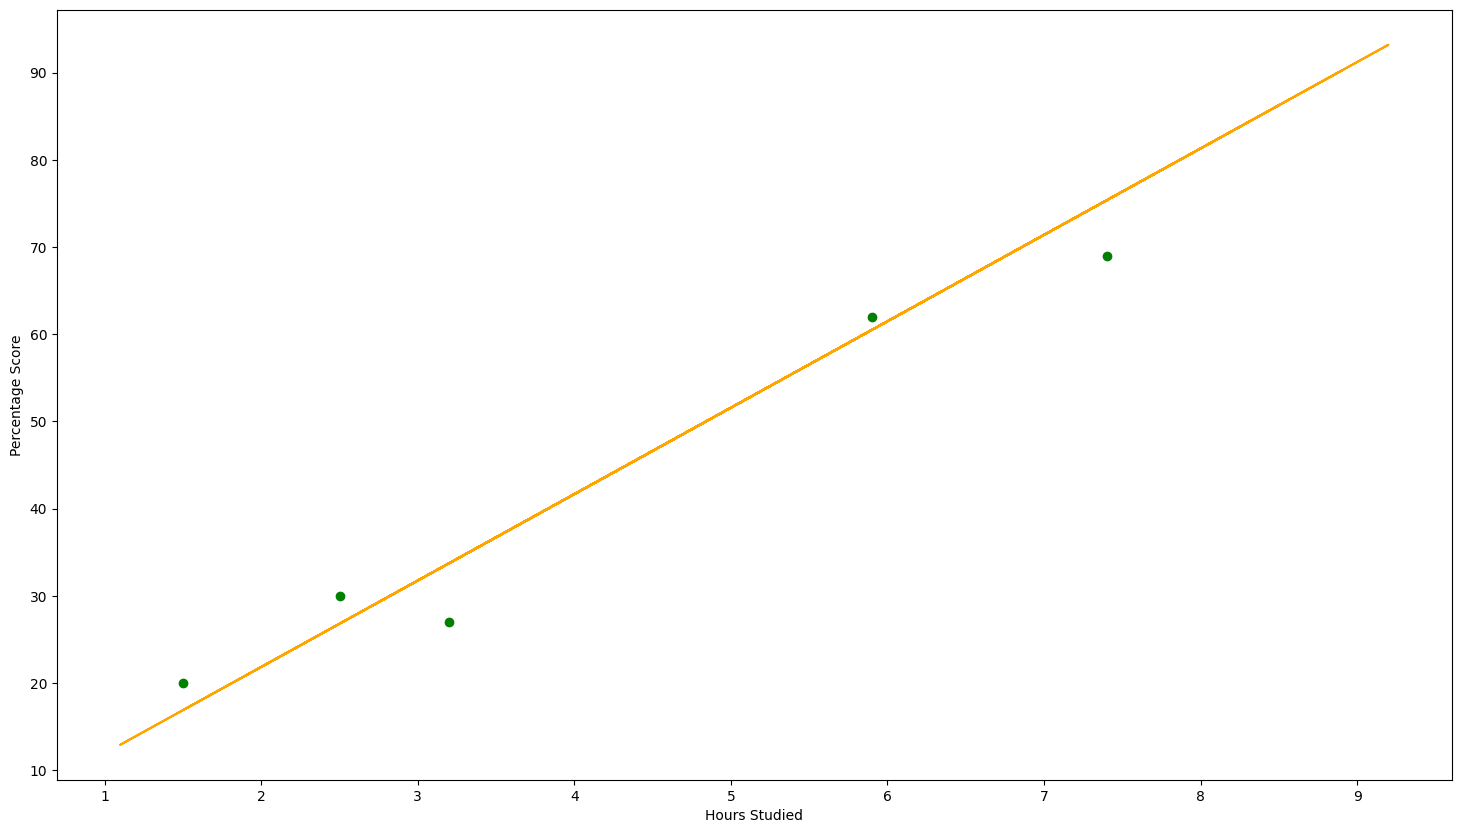

In [141]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x,line,color = 'orange');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Model Prediction

In [140]:
print(x_test)#testing data
y_pred = model.predict(x_test)#score prediction

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [139]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [144]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [145]:
#comparing actual vs predicted values
actual_vs_predicted= pd.DataFrame({ 'Actual':[y_test],'predicted':[y_pred]})
actual_vs_predicted

,Actual,predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


# Predicted score if a student studies for 9.25 hours/day

In [146]:
hours= 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


# Model Evaluation:

In [147]:
#evaluating the trained model
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


#             THANK YOU!!!!         